### Mouse pose classification

In [48]:
import glob
import os
import re #regex library
from platform import python_version

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [49]:
print("current python version:", python_version())

current python version: 3.7.9


In [50]:
all_path = []
for path in glob.glob("../data_all/mouse_pos/*.jpg"):
    all_path.append(path)
#     print(path)
len(all_path)

4555

In [13]:
data = pd.read_csv("../data_all/mouse_body_pos.csv")
data.head()

,img_no,ear_r_x,ear_r_y,ear_l_x,ear_l_y,eye_r_x,eye_r_y,eye_l_x,eye_l_y,nose_x,nose_y
0,img_0001.jpg,265.0,85.0,382.0,95.0,280.0,198.0,342.0,199.0,296.0,276.0
1,img_0002.jpg,248.0,7.0,286.0,24.0,NaN,NaN,206.0,42.0,124.0,41.0
2,img_0003.jpg,265.0,85.0,381.0,96.0,276.0,197.0,338.0,199.0,291.0,276.0
3,img_0004.jpg,156.0,49.0,NaN,NaN,215.0,73.0,NaN,NaN,279.0,83.0
4,img_0005.jpg,170.0,99.0,230.0,99.0,192.0,143.0,234.0,147.0,227.0,183.0


In [14]:
fr_num = 946

data_path = '../data_all/mouse_pos'
img_path = os.path.join(data_path,"img_0"+str(fr_num)+'.jpg')
print(img_path)

../data_all/mouse_pos/img_0946.jpg


In [15]:
single_df=data.iloc[[fr_num-1]]
single_df

,img_no,ear_r_x,ear_r_y,ear_l_x,ear_l_y,eye_r_x,eye_r_y,eye_l_x,eye_l_y,nose_x,nose_y
945,img_0946.jpg,210.0,97.0,334.0,119.0,215.0,150.0,286.0,158.0,222.0,183.0


In [16]:
not single_df.isnull().values.any()

True

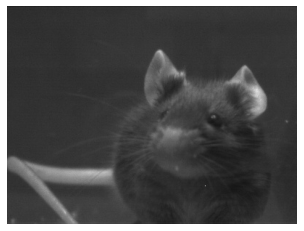

In [17]:
img=cv2.imread(img_path) 
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

In [18]:
# Function to return the coords of each body part and hold the labeled image

def showMarks(fr_num, data): 
    # Path 
    data_path = '../data_all/mouse_pos'
    img_path = os.path.join(data_path,"img_0"+str(fr_num)+'.jpg')
    single_df=data.iloc[[fr_num-1]]
    if not single_df.isnull().values.any():
        # Retrieve the coordinates of the body parts to define variables
        ear_rx, ear_ry = int(single_df[['ear_r_x']].squeeze()), int(single_df[['ear_r_y']].squeeze())
        ear_lx, ear_ly = int(single_df[['ear_l_x']].squeeze()), int(single_df[['ear_l_y']].squeeze())
        eye_rx, eye_ry = int(single_df[['eye_r_x']].squeeze()), int(single_df[['eye_r_y']].squeeze())
        eye_lx, eye_ly = int(single_df[['eye_l_x']].squeeze()), int(single_df[['eye_l_y']].squeeze())
        n_x, n_y = int(single_df[['nose_x']].squeeze()), int(single_df[['nose_y']].squeeze())
        # calculate the centers
        ear_cx, ear_cy = int((ear_rx+ear_lx)/2), int((ear_ry+ear_ly)/2)
        eye_cx, eye_cy = int((eye_rx+eye_lx)/2), int((eye_ry+eye_ly)/2)
        
        all_list = np.empty((7,2))
        all_list[:] = np.nan
        all_list[0] = ear_rx, ear_ry
        all_list[1] = ear_lx, ear_ly
        all_list[2] = ear_cx, ear_cy
        all_list[3] = eye_rx, eye_ry
        all_list[4] = eye_lx, eye_ly
        all_list[5] = eye_cx, eye_cy
        all_list[6] = n_x, n_y
        
        radius = 1
        cyan=[0,255,255]
        yellow=[255,255,0]
        magenta=[255,0,255]
        font=cv2.FONT_HERSHEY_SIMPLEX
        font_scale=0.5

        img=cv2.imread(img_path) 
        img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_marked=img

        # plot the detected body parts
        img_marked=cv2.circle(img_marked, (ear_rx, ear_ry), radius=radius, color=cyan, thickness=5)
        img_marked=cv2.circle(img_marked, (ear_lx, ear_ly), radius=radius, color=cyan, thickness=5)
        img_marked=cv2.circle(img_marked, (eye_rx, eye_ry), radius=radius, color=yellow, thickness=5)
        img_marked=cv2.circle(img_marked, (eye_lx, eye_ly), radius=radius, color=yellow, thickness=5)
        img_marked=cv2.circle(img_marked, (n_x, n_y), radius=radius, color=magenta, thickness=5)

        # mark the center position
        img_marked=cv2.putText(img_marked, 'x', (ear_cx, ear_cy), font, font_scale, color=cyan, thickness=2)
        img_marked=cv2.putText(img_marked, 'x', (eye_cx, eye_cy), font, font_scale, color=yellow, thickness=2)
    #     return plt.imshow(img_marked), print('test')
        return img_marked, all_list.astype(int)
    else:
        return print('Check whether the data strip contains NaN values.')

numpy.int64

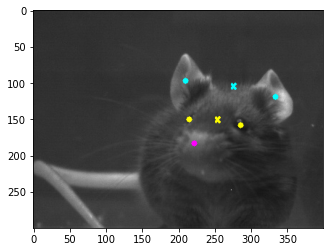

In [19]:
fr_num=946
img, mark = showMarks(fr_num=fr_num, data=data)
plt.imshow(img)
type(mark[0][0])

In [20]:
mark

array([[210,  97],
       [334, 119],
       [272, 108],
       [215, 150],
       [286, 158],
       [250, 154],
       [222, 183]])

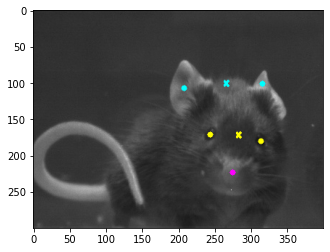

In [21]:
fr_num = 900
img, mark = showMarks(fr_num, data)
plt.imshow(img)

In [22]:
def panCheck(img, mark):
    if not np.isnan(np.sum(mark)):
        ear_rx, ear_ry = mark[0]
        ear_lx, ear_ly = mark[1]
        ear_cx, ear_cy = mark[2]
        eye_rx, eye_ry = mark[3]
        eye_lx, eye_ly = mark[4]
        eye_cx, eye_cy = mark[5]
        n_x, n_y = mark[6]
        # initial check
        if ear_rx < eye_rx & eye_rx < n_x:
            print('right side clear')
        if ear_lx > eye_lx & eye_lx > n_x:
            print('left side clear')
         # Hypothesis 1: critical part is the relation between the nose and eyes
        hori_eyes=abs(eye_lx-eye_rx) # distance between the eyes (horizontal)
        n_r_dev_raw=abs(eye_rx-n_x)
        n_l_dev_raw=abs(eye_lx-n_x)
        assert n_r_dev_raw+n_l_dev_raw == hori_eyes
        # how much the nose deviates: 
        n_r_dev=n_r_dev_raw/hori_eyes #if smaller than 0.5 -> turning to the right
        n_l_dev=n_l_dev_raw/hori_eyes # if smaller than 0.5 -> turning to the left
#         print(f'|R_eye---{n_r_dev}---N---{n_l_dev}---L_eye|')
        print('|R_eye---({:.2f})---N---({:.2f})---L_eye|'.format(n_r_dev, n_l_dev))
        
        plt.imshow(img)
        plt.axis('off')
        
        # define the front face when n_r_dev and n_l_dev is larger than 0.25 
        # to be a front face, those numbers should be between 0.5 w.r.t. the center
        if (n_r_dev >0.25) & (n_l_dev>0.25):
            print('front face in terms of x-coords') # (1)
        elif n_r_dev >0.25:
            print('turning to the left') # (2)
        else:
            print('turning to the right') #(3)
        
    else:
        return print('Check whether the datastrip contains NaN values.')
    

right side clear
left side clear
|R_eye---(0.44)---N---(0.56)---L_eye|
front face in terms of x-coords


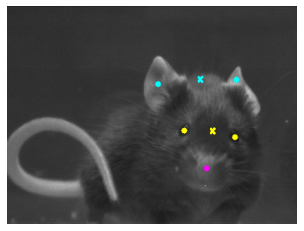

In [23]:
panCheck(img, mark)

In [34]:
def tiltCheck(img, mark):
    if not np.isnan(np.sum(mark)):
        ear_rx, ear_ry = mark[0]
        ear_lx, ear_ly = mark[1]
        ear_cx, ear_cy = mark[2]
        eye_rx, eye_ry = mark[3]
        eye_lx, eye_ly = mark[4]
        eye_cx, eye_cy = mark[5]
        n_x, n_y = mark[6]
        
        # initial check   
        # Hypothesis 1: comparison between the distances (nose to eyes, eyes to ears) may imply important info.
        eye2ear_vert_raw=abs(eye_cy-ear_cy)
        eye2n_vert_raw=abs(eye_cy-n_y)
        ear2n_vert_raw=abs(ear_cy-n_y)
        assert eye2ear_vert_raw+eye2n_vert_raw == ear2n_vert_raw
        
        # which is larger and how much is the difference?
        eye2ear_vert_pro=round(eye2ear_vert_raw/ear2n_vert_raw,2) # round at 2nd decimal
        eye2n_vert_pro=round(eye2n_vert_raw/ear2n_vert_raw,2)
        print('vertical distance from [Eye to Ear] : [Eye to Nose] = {:.2f} : {:.2f}'.format(eye2ear_vert_pro, eye2n_vert_pro))

        plt.imshow(img)
        plt.axis('off')
        
        # Hypothesis 2: Define the tilt-wise front face when the proportion is within 0.4 - 0.6
        if (eye2ear_vert_pro <= 0.6) &  (eye2ear_vert_pro >=0.4):
            print('front face in terms of y-coords') # (1)
        elif eye2ear_vert_pro > 0.6:
            print('tilting down')
        else:
            print('tiliting up')    
    
    else:
        return print('Check whether the datastrip contains NaN values.')        

vertical distance from [Eye to Ear] : [Eye to Nose] = 0.60 : 0.40
front face in terms of y-coords


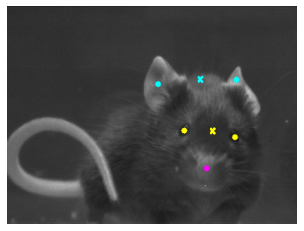

In [35]:
tiltCheck(img, mark)

In [53]:
def frame2Path(fr_num, all_path):
    fr_num=str(fr_num)    
    if len(fr_num)==1:
        fr_num = '000'+fr_num
    elif len(fr_num)==2:
        fr_num = '00'+fr_num
    elif len(fr_num)==3:
        fr_num = '0'+fr_num         
    split_path = os.path.split(all_path[0]) # an arbitrary path from all paths 
    path = os.path.join(split_path[0], "img_"+fr_num+".jpg")
    return fr_num, path

In [54]:
def showImage(fr_num, all_path):
    fr_num, path = frame2Path(fr_num, all_path)
    img=cv2.imread(path) 
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = Image.open(path)
    plt.imshow(img) 
    plt.axis('off') 
    plt.show()

In [65]:
def showData(fr_num):
    single_df=data.iloc[[fr_num-1]]
    return single_df

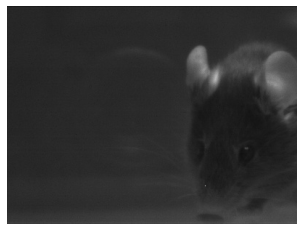

In [63]:
showImage(8, all_path)

In [66]:
showData(8)

,img_no,ear_r_x,ear_r_y,ear_l_x,ear_l_y,eye_r_x,eye_r_y,eye_l_x,eye_l_y,nose_x,nose_y
7,img_0008.jpg,262.0,85.0,376.0,96.0,267.0,197.0,331.0,203.0,280.0,280.0


In [68]:
fr_num = 80
img, mark = showMarks(fr_num, data)

Check whether the data strip contains NaN values.


TypeError: cannot unpack non-iterable NoneType object

In [ ]:
fr_num = 8
img, mark = showMarks(fr_num, data)
panCheck(img, mark)
tiltCheck(img, mark)

In [115]:
tiltCheck(img, mark)

vertical distance from [Eye to Ear] : [Eye to Nose] = 0.57 : 0.43


In [77]:
# a,b = mark[0]
# type(a)
np.isnan(np.sum(mark))

False

#### Case differenciation

Consider 9 cases, and differentiate the pose first with x-coords (pan) and then with y-coords (tilt)

For above (1),(2), and (3) cases, differentiate cases again w.r.t. y-coords.
Let's take a look another image.

In [269]:
ear_cy, eye_cy

(115, 148)

In [270]:
# TO DEFINE the FRONT in terms of y-coords: 
# initial check
assert (ear_cy < eye_cy) & (eye_cy < n_y) # consider when either is NaN so that there's no cy coords

# Hypothesis2: comparison between the distances (nose to eyes, eyes to ears) may imply important info.
eye2ear_raw=abs(eye_cy-ear_cy)
eye2n_raw=abs(eye_cy-n_y)
ear2n_raw=abs(ear_cy-n_y)
assert eye2ear_raw+eye2n_raw == ear2n_raw

# which is larger and how much is the difference?
eye2ear_pro=round(eye2ear_raw/ear2n_raw,2)
eye2n_pro=round(eye2n_raw/ear2n_raw,2)

(eye2ear_pro, eye2n_pro)

# well, the proportion does not change much, because eye2ear_pro is normally larger than eye2n_pro
# even it looks like the mouse looks down or up

# # define the front face when n_r_dev and n_l_dev is larger than 0.25 
# # to be a front face, those numbers should be between 0.5 w.r.t. the center
# if (n_r_dev >0.25) & (n_l_dev>0.25):
#     print('front face in terms of x-coords') # (1)
# elif n_r_dev >0.25:
#     print('turning to the left') # (2)
# else:
#     print('turning to the right') #(3)

(0.58, 0.42)

In [252]:
abs(ear_cy-n_y)

101

In [226]:
round(eye2ear_pro,2)

0.56

In [ ]:
# Function to return the coords of each body part and hold the labeled image

def showMarks(fr_num, data): 
    # Path 
    data_path = '../data_all/mouse_pos'
    img_path = os.path.join(data_path,"img_0"+str(fr_num)+'.jpg')
    single_df=data.iloc[[fr_num-1]]
    if not single_df.isnull().values.any():
        # Retrieve the coordinates of the body parts to define variables
        ear_rx, ear_ry = int(single_df[['ear_r_x']].squeeze()), int(single_df[['ear_r_y']].squeeze())
        ear_lx, ear_ly = int(single_df[['ear_l_x']].squeeze()), int(single_df[['ear_l_y']].squeeze())
        eye_rx, eye_ry = int(single_df[['eye_r_x']].squeeze()), int(single_df[['eye_r_y']].squeeze())
        eye_lx, eye_ly = int(single_df[['eye_l_x']].squeeze()), int(single_df[['eye_l_y']].squeeze())
        n_x, n_y = int(single_df[['nose_x']].squeeze()), int(single_df[['nose_y']].squeeze())
        # calculate the centers
        ear_cx, ear_cy = int((ear_rx+ear_lx)/2), int((ear_ry+ear_ly)/2)
        eye_cx, eye_cy = int((eye_rx+eye_lx)/2), int((eye_ry+eye_ly)/2)
        
        all_list = np.empty((7,2))
        all_list[:] = np.nan
        all_list[0] = ear_rx, ear_ry
        all_list[1] = ear_lx, ear_ly
        all_list[2] = ear_cx, ear_cy
        all_list[3] = eye_rx, eye_ry
        all_list[4] = eye_lx, eye_ly
        all_list[5] = eye_cx, eye_cy
        all_list[6] = n_x, n_y
        
        radius = 1
        cyan=[0,255,255]
        yellow=[255,255,0]
        magenta=[255,0,255]
        font=cv2.FONT_HERSHEY_SIMPLEX
        font_scale=0.5

        img=cv2.imread(img_path) 
        img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_marked=img

        # plot the detected body parts
        img_marked=cv2.circle(img_marked, (ear_rx, ear_ry), radius=radius, color=cyan, thickness=5)
        img_marked=cv2.circle(img_marked, (ear_lx, ear_ly), radius=radius, color=cyan, thickness=5)
        img_marked=cv2.circle(img_marked, (eye_rx, eye_ry), radius=radius, color=yellow, thickness=5)
        img_marked=cv2.circle(img_marked, (eye_lx, eye_ly), radius=radius, color=yellow, thickness=5)
        img_marked=cv2.circle(img_marked, (n_x, n_y), radius=radius, color=magenta, thickness=5)

        # mark the center position
        img_marked=cv2.putText(img_marked, 'x', (ear_cx, ear_cy), font, font_scale, color=cyan, thickness=2)
        img_marked=cv2.putText(img_marked, 'x', (eye_cx, eye_cy), font, font_scale, color=yellow, thickness=2)
    #     return plt.imshow(img_marked), print('test')
        return img_marked, all_list.astype(int)

In [ ]:
def panCheck(img, mark):
    if not np.isnan(np.sum(mark)):
        ear_rx, ear_ry = mark[0]
        ear_lx, ear_ly = mark[1]
        ear_cx, ear_cy = mark[2]
        eye_rx, eye_ry = mark[3]
        eye_lx, eye_ly = mark[4]
        eye_cx, eye_cy = mark[5]
        n_x, n_y = mark[6]
        # initial check
        if ear_rx < eye_rx & eye_rx < n_x:
            print('right side clear')
        if ear_lx > eye_lx & eye_lx > n_x:
            print('left side clear')
         # Hypothesis1: critical part is the relation between the nose and eyes
        hori_eyes=abs(eye_lx-eye_rx) # distance between the eyes (horizontal)
        n_r_dev_raw=abs(eye_rx-n_x)
        n_l_dev_raw=abs(eye_lx-n_x)
        assert n_r_dev_raw+n_l_dev_raw == hori_eyes
        # how much the nose deviates: 
        n_r_dev=n_r_dev_raw/hori_eyes #if smaller than 0.5 -> turning to the right
        n_l_dev=n_l_dev_raw/hori_eyes # if smaller than 0.5 -> turning to the left
#         print(f'|R_eye---{n_r_dev}---N---{n_l_dev}---L_eye|')
        print('|R_eye---({:.2f})---N---({:.2f})---L_eye|'.format(n_r_dev, n_l_dev))
        
        plt.imshow(img)
        plt.axis('off')
        
        # define the front face when n_r_dev and n_l_dev is larger than 0.25 
        # to be a front face, those numbers should be between 0.5 w.r.t. the center
        if (n_r_dev >0.25) & (n_l_dev>0.25):
            print('front face in terms of x-coords') # (1)
        elif n_r_dev >0.25:
            print('turning to the left') # (2)
        else:
            print('turning to the right') #(3)
        
    else:
        return print('Check whether the datastrip contains NaN values.')
    

Misc: 

* no nose but all others exist? 1078
* check NaN value problem: not to squeeze it
* see 1768, to check the tilt